In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn as sk
#preprocessing module
from sklearn.model_selection import train_test_split

# Merge two datasets

In [2]:
dfr = pd.read_csv("winequality-red.csv", sep=',')
print(dfr.shape)
#adding 
temp=[]
for i in range(dfr.shape[0]):
    temp.append(1)
print(len(temp))
dfr["red/white"]=temp

dfw = pd.read_csv("winequality-white.csv", sep=';')
print(dfw.shape)
temp=[]
for i in range(dfw.shape[0]):
    temp.append(0)
print(len(temp))
dfw["red/white"]=temp

(1599, 12)
1599
(4898, 12)
4898


In [3]:
data = pd.concat([dfr,dfw])
data.shape

(6497, 13)

# Explore the features

In [4]:
data.head(1600)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red/white
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red/white'],
      dtype='object')

In [6]:
extra = data[data.duplicated()]
extra.shape

(1177, 13)

# Look at the features distributions

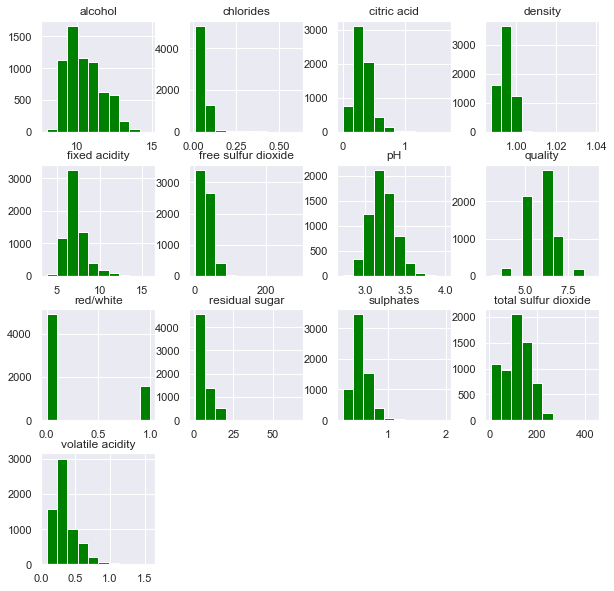

In [7]:
sns.set()
data.hist(figsize=(10,10), color='green')
plt.show()

# Find high correlated features against the target

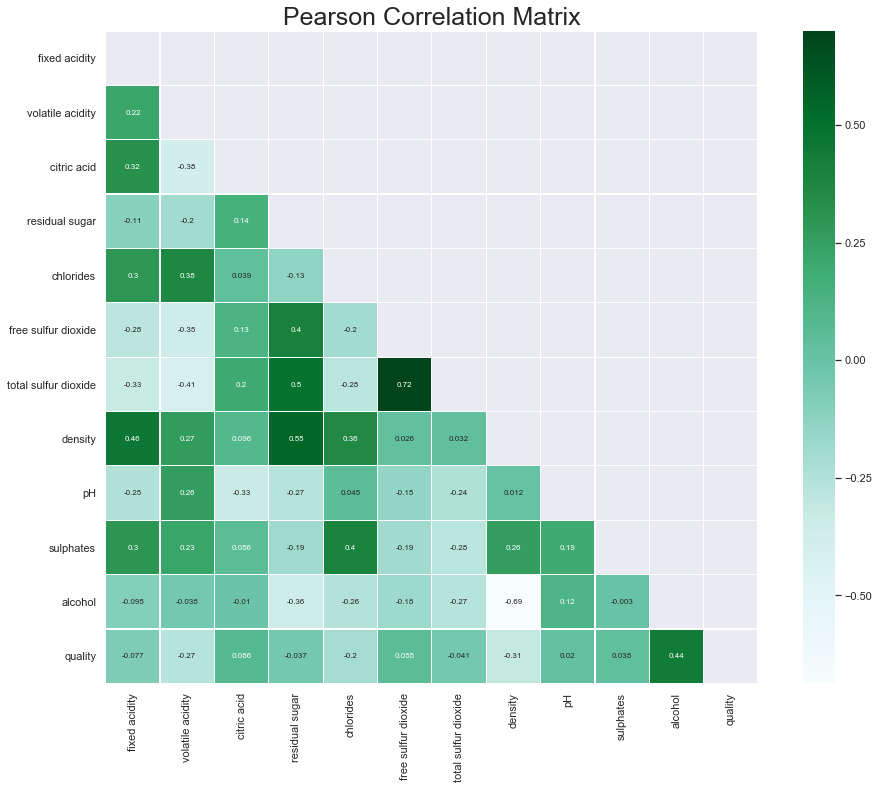

In [8]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
           linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": 1});

In [9]:
data.nunique()

fixed acidity            106
volatile acidity         187
citric acid               89
residual sugar           316
chlorides                230
free sulfur dioxide      135
total sulfur dioxide     276
density                 1103
pH                       108
sulphates                111
alcohol                  111
quality                    7
red/white                  2
dtype: int64

# Quality categories vs. alcohol content

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


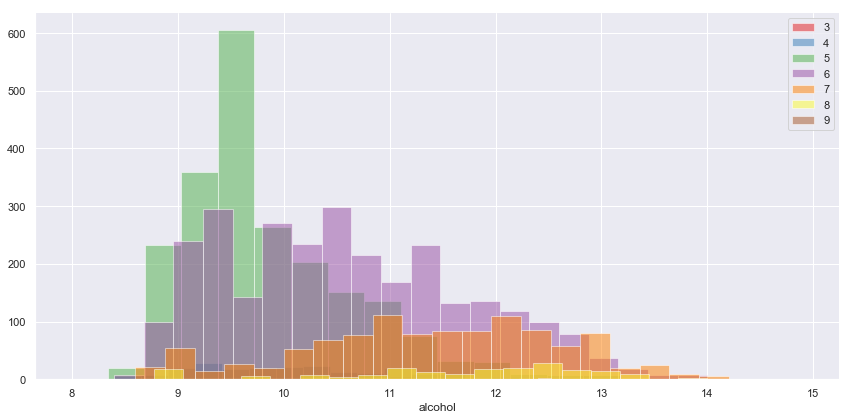

In [10]:
g = sns.FacetGrid(data,hue='quality',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'alcohol',bins=20,alpha=0.5)
plt.legend()

# Another look at the distributions of high correlative features

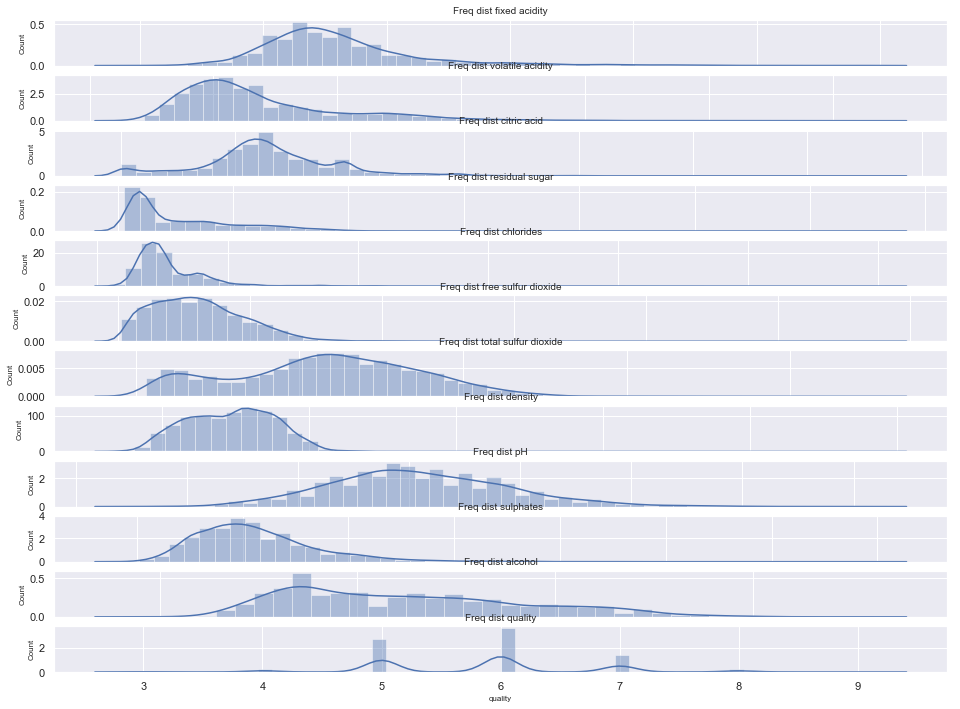

In [11]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

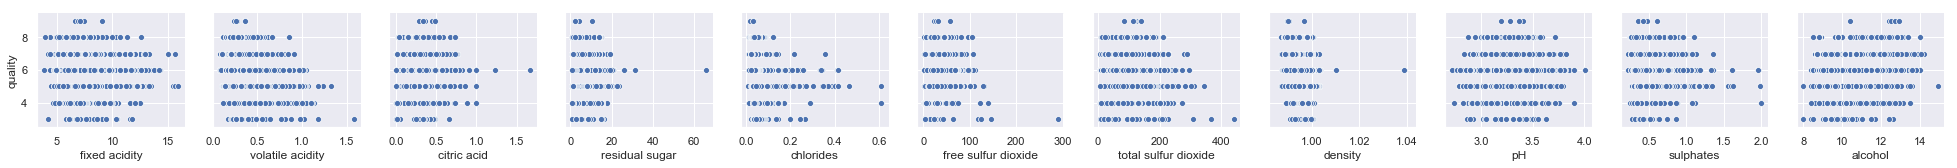

In [13]:
sns.pairplot(data, x_vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"], y_vars=["quality"])

In [14]:
from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#x =data["density"].values
#y =data["alcohol"].values
#z =data["quality"].values
#print(x)
#[float(i) for i in lst]

#x=[float(i) for i in x]
#y=[float(i) for i in y]
#z=[float(i) for i in z]
#ax.scatter(x, y, z, c='r', marker='o')
#ax.scatter(x, y, z, c='g', marker='o')
#ax.set_xlabel('Density')
#ax.set_ylabel('Alcohol')
#ax.set_zlabel('Quality')

#plt.show()

# Look at the target categories in 3D

Text(0.5, 0, 'citric acid')

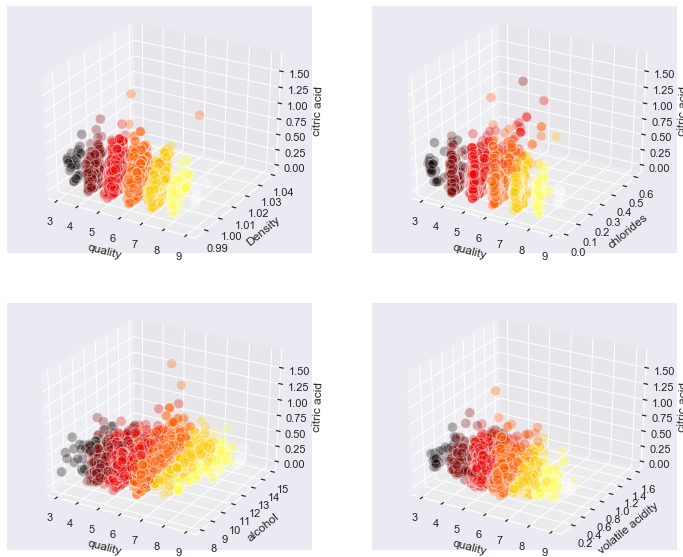

In [15]:
fig  = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2,2,1, projection='3d')
xs = data['quality']
ys = data['density']
zs = data['citric acid']
ax.scatter(xs, ys, zs, c=data['quality'], cmap = plt.hot(),s=100, alpha=0.3, edgecolors='w')
ax.set_xlabel('quality')
ax.set_ylabel('Density')
ax.set_zlabel('citric acid')

ax = fig.add_subplot(2,2,2, projection='3d')
xs = data['quality']
ys = data['chlorides']
zs = data['citric acid']
ax.scatter(xs, ys, zs, c=data['quality'], cmap = plt.hot(),s=100, alpha=0.3, edgecolors='w')
ax.set_xlabel('quality')
ax.set_ylabel('chlorides')
ax.set_zlabel('citric acid')

ax = fig.add_subplot(2,2,3, projection='3d')
xs = data['quality']
ys = data['alcohol']
zs = data['citric acid']
ax.scatter(xs, ys, zs, c=data['quality'], cmap = plt.hot(),s=100, alpha=0.3, edgecolors='w')
ax.set_xlabel('quality')
ax.set_ylabel('alcohol')
ax.set_zlabel('citric acid')

ax = fig.add_subplot(2,2,4, projection='3d')
xs = data['quality']
ys = data['volatile acidity']
zs = data['citric acid']
ax.scatter(xs, ys, zs, c=data['quality'], cmap = plt.hot(),s=100, alpha=0.3, edgecolors='w')
ax.set_xlabel('quality')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('citric acid')


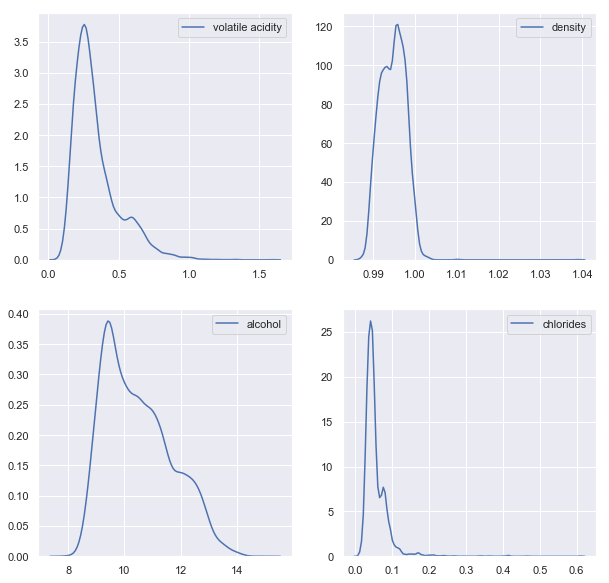

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))

sns.kdeplot(data = data['volatile acidity'], kernel = 'gau', ax = ax1)

sns.kdeplot(data = data['density'], kernel = 'gau', ax = ax2)

sns.kdeplot(data = data['alcohol'], kernel = 'gau', ax = ax3)

sns.kdeplot(data = data['chlorides'], kernel = 'gau', ax = ax4)

plt.show()

In [17]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red/white'],
      dtype='object')

# Check the number of quality categories

In [18]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

In [19]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [20]:
x_columns = 12
x = data.iloc[:,0:x_columns].values 
y = data.iloc[:, x_columns].values

In [21]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

# Our target this time is red/white category

In [22]:
x = data.drop('red/white', axis = 1)
y = data['red/white']

In [23]:
#y=pd.get_dummies(data['red/white'])

In [24]:
y.head(1)
y.shape

(6497,)

# Split the model and scale

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler 

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Import keras

In [28]:
from keras.models import Sequential
model_k = Sequential()
from keras.layers import Dense

Using TensorFlow backend.


# I use 2 hidden layers and one output to create regular 3 layer ANN

In [29]:
input_layer = Dense(units=1, activation='relu', kernel_initializer='uniform')
model_k.add(input_layer)
hidden_layer1 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer1)
hidden_layer2 = Dense(units=6, activation='relu', kernel_initializer='uniform')
model_k.add(hidden_layer2)
output_layer = Dense(units=1, activation='sigmoid', kernel_initializer='uniform')
model_k.add(output_layer)

In [30]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

# Run the model

In [32]:
model_k.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_k.fit(x_train, y_train, batch_size = 10, epochs = 10)
#y_train.shape

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5197/5197 [==============================] - 1s 224us/step - loss: 0.5139 - acc: 0.7522
Epoch 2/10
5197/5197 [==============================] - 1s 155us/step - loss: 0.2345 - acc: 0.8830
Epoch 3/10
5197/5197 [==============================] - 1s 148us/step - loss: 0.1720 - acc: 0.9842
Epoch 4/10
5197/5197 [==============================] - 1s 205us/step - loss: 0.1386 - acc: 0.9875
Epoch 5/10
5197/5197 [==============================] - 1s 154us/step - loss: 0.1144 - acc: 0.9885
Epoch 6/10
5197/5197 [==============================] - 1s 148us/step - loss: 0.0966 - acc: 0.9906
Epoch 7/10
5197/5197 [==============================] - 1s 149us/step - loss: 0.0839 - acc: 0.9915
Epoch 8/10
5197/5197 [==============================] - 1s 149us/step - loss: 0.0742 - acc: 0.9925
Epoch 9/10
5197/5197 [==============================] - 1s 149us/step - loss: 0.0667 - acc: 0.9921
Epoch 10/10
5197/5197 [==============================] - 1s 1

In [33]:
y_pred_k = model_k.predict(x_test)

In [34]:
y_test[0:10]

3717    0
3611    0
1919    0
23      0
844     0
1922    0
3612    0
3337    0
1161    1
4394    0
Name: red/white, dtype: int64

In [35]:
y_pred_k = (y_pred_k > 0.5)

In [36]:
y_pred_k[0:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

# Import and print confusion matrix report

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
#confusion_matrix = confusion_matrix(y_test, y_pred_k)
confusion_matrix = confusion_matrix(y_test, y_pred_k)

In [40]:
print(classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       0.97      0.99      0.98       311

   micro avg       0.99      0.99      0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [41]:
import livelossplot

In [43]:
plot_losses = livelossplot.PlotLossesKeras()

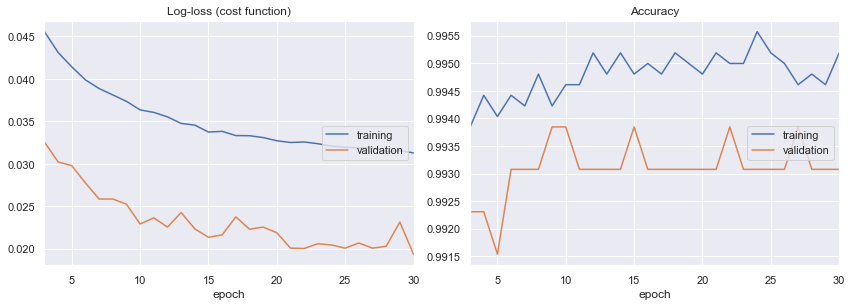

Log-loss (cost function):
training   (min:    0.031, max:    0.055, cur:    0.031)
validation (min:    0.019, max:    0.039, cur:    0.019)

Accuracy:
training   (min:    0.993, max:    0.996, cur:    0.995)
validation (min:    0.992, max:    0.994, cur:    0.993)


In [44]:
model_k.fit(x_train, y_train, batch_size = 5, callbacks = [plot_losses], epochs = 30, validation_data = (x_test, y_test))

# Run classification models and compare

In [39]:
x=data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol", "quality" ]]
x=preprocessing.scale(x)


y=data["red/white"]

#y=preprocessing.normalize([y])
print(y.shape)
#scale(df[])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model_all = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), 
        DecisionTreeClassifier(), SVC()]
         

for model in model_all:
    #print(y_train)
    #print(np.unique(y_train))
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(score)
    model=None



/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(6497,)
0.9938461538461538
0.9953846153846154
0.9946153846153846
0.9846153846153847
0.9976923076923077


/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# It looks like all the models predict with the same accuracy

In [6]:
import seaborn as sns
sns.set()
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special
py.offline.init_notebook_mode(connected=True)


In [10]:
#sns.countplot(x='quality', data=data)